In [556]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import sys
from dmba import regressionSummary, adjusted_r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [557]:
toyota = pd.read_csv('ToyotaCorolla_HW.csv')
toyota.head()

,Id,Price,Age_08_22,KM,Fuel_Type,HP,Color,Automatic,CC,Doors,...,Airbag_1,Airbag_2,Airco,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim
0,1,13500,23,46986,Diesel,90,Blue,0,2000,3,...,1,1,0,0,1,1,0,0.0,0,0
1,2,13750,23,72937,Diesel,90,Silver,0,2000,3,...,1,1,1,1,0,1,0,0.0,0,0
2,3,13950,24,41711,Diesel,90,Blue,0,2000,3,...,1,1,0,0,0,1,0,0.0,0,0
3,4,14950,26,48000,Diesel,90,Black,0,2000,3,...,1,1,0,0,0,1,0,0.0,0,0
4,5,13750,30,38500,Diesel,90,Black,0,2000,3,...,1,1,1,0,1,1,0,1.0,0,0


In [558]:
print(toyota.dtypes)
toyota.shape

Id                   int64
Price                int64
Age_08_22            int64
KM                   int64
Fuel_Type           object
HP                   int64
Color               object
Automatic            int64
CC                   int64
Doors                int64
Cylinders            int64
Gears                int64
Mfr_Guarantee        int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
CD_Player            int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps          float64
Sport_Model          int64
Metallic_Rim         int64
dtype: object


(1418, 24)

In [559]:
toyota.isnull().sum()

Id                    0
Price                 0
Age_08_22             0
KM                    0
Fuel_Type             0
HP                    0
Color                 0
Automatic             0
CC                    0
Doors                 0
Cylinders             0
Gears                 0
Mfr_Guarantee         0
ABS                   0
Airbag_1              0
Airbag_2              0
Airco                 0
CD_Player             0
Powered_Windows       0
Power_Steering        0
Radio                 0
Mistlamps          1034
Sport_Model           0
Metallic_Rim          0
dtype: int64

In [560]:
toyota.corr()

,Id,Price,Age_08_22,KM,HP,Automatic,CC,Doors,Cylinders,Gears,...,Airbag_1,Airbag_2,Airco,CD_Player,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Metallic_Rim
Id,1.000000,-0.732603,0.904323,0.267431,-0.107095,0.078957,-0.117758,-0.115532,NaN,-0.046699,...,-0.121967,-0.357957,-0.377569,-0.460224,-0.227820,-0.090043,-0.013024,-0.126783,-0.013304,-0.018991
Price,-0.732603,1.000000,-0.873203,-0.571537,0.316799,0.020522,0.124855,0.169715,NaN,0.068355,...,0.092031,0.251024,0.421972,0.484980,0.348813,0.062425,-0.044700,0.290777,0.148770,0.100550
Age_08_22,0.904323,-0.873203,1.000000,0.503307,-0.156498,0.043645,-0.097701,-0.133056,NaN,-0.008574,...,-0.103768,-0.329137,-0.395049,-0.510294,-0.274269,-0.067296,0.012220,-0.125937,-0.093351,-0.035894
KM,0.267431,-0.571537,0.503307,1.000000,-0.336386,-0.080406,0.103108,-0.031792,NaN,0.014116,...,-0.016890,-0.137696,-0.128352,-0.265422,-0.150623,0.008489,0.012834,-0.070158,-0.035110,-0.009749
HP,-0.107095,0.316799,-0.156498,-0.336386,1.000000,0.008894,0.036361,0.091376,NaN,0.213303,...,0.025088,0.024721,0.244756,0.106838,0.266699,0.049251,0.011934,0.241128,-0.006237,0.202395
Automatic,0.078957,0.020522,0.043645,-0.080406,0.008894,1.000000,0.067950,-0.035099,NaN,-0.099516,...,-0.013204,-0.003444,-0.029360,-0.026219,-0.005970,-0.005497,-0.011389,0.034380,0.001688,-0.082609
CC,-0.117758,0.124855,-0.097701,0.103108,0.036361,0.067950,1.000000,0.078400,NaN,0.014871,...,0.022456,0.026319,0.119407,0.060522,0.055491,0.032763,-0.002757,-0.002379,-0.033487,0.001916
Doors,-0.115532,0.169715,-0.133056,-0.031792,0.091376,-0.035099,0.078400,1.000000,NaN,-0.159612,...,0.052203,0.018057,0.162831,0.087034,0.101644,0.058464,-0.007734,-0.004559,-0.140360,-0.043253
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.046699,0.068355,-0.008574,0.014116,0.213303,-0.099516,0.014871,-0.159612,NaN,1.000000,...,0.002754,0.096265,0.147975,-0.046455,0.133319,0.021475,0.014990,0.143474,0.177472,0.297808


In [561]:
toyota_ds = toyota[['Age_08_22', 'KM', 'Fuel_Type', 'Doors', 'Automatic', 'CC', 'Powered_Windows', 'Sport_Model', 'Gears']]

In [562]:
toyota_ds['Fuel_Type'].value_counts()

Petrol    1250
Diesel     151
CNG         17
Name: Fuel_Type, dtype: int64

In [567]:
toyota_df = pd.get_dummies(toyota_ds)
toyota_df.head()

,Age_08_22,KM,Doors,Automatic,CC,Powered_Windows,Sport_Model,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,3,0,2000,1,0,5,0,1,0
1,23,72937,3,0,2000,0,0,5,0,1,0
2,24,41711,3,0,2000,0,0,5,0,1,0
3,26,48000,3,0,2000,0,0,5,0,1,0
4,30,38500,3,0,2000,1,0,5,0,1,0


In [568]:
toyota_df.isnull().sum()

Age_08_22           0
KM                  0
Doors               0
Automatic           0
CC                  0
Powered_Windows     0
Sport_Model         0
Gears               0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [565]:
toyota_df.corr()

,Age_08_22,KM,Doors,Automatic,CC,Powered_Windows,Sport_Model,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Age_08_22,1.000000,0.503307,-0.133056,0.043645,-0.097701,-0.274269,-0.093351,-0.008574,0.000023,-0.093617,0.089348
KM,0.503307,1.000000,-0.031792,-0.080406,0.103108,-0.150623,-0.035110,0.014116,0.143960,0.408708,-0.438586
Doors,-0.133056,-0.031792,1.000000,-0.035099,0.078400,0.101644,-0.140360,-0.159612,0.011001,0.020634,-0.023399
Automatic,0.043645,-0.080406,-0.035099,1.000000,0.067950,-0.005970,0.001688,-0.099516,0.002198,-0.082724,0.078218
CC,-0.097701,0.103108,0.078400,0.067950,1.000000,0.055491,-0.033487,0.014871,0.006119,0.324314,-0.311612
Powered_Windows,-0.274269,-0.150623,0.101644,-0.005970,0.055491,1.000000,-0.008496,0.133319,-0.006303,-0.093136,0.091019
Sport_Model,-0.093351,-0.035110,-0.140360,0.001688,-0.033487,-0.008496,1.000000,0.177472,-0.057138,-0.008110,0.026983
Gears,-0.008574,0.014116,-0.159612,-0.099516,0.014871,0.133319,0.177472,1.000000,-0.049742,-0.048791,0.063321
Fuel_Type_CNG,0.000023,0.143960,0.011001,0.002198,0.006119,-0.006303,-0.057138,-0.049742,1.000000,-0.038028,-0.300473
Fuel_Type_Diesel,-0.093617,0.408708,0.020634,-0.082724,0.324314,-0.093136,-0.008110,-0.048791,-0.038028,1.000000,-0.941674


In [569]:
toyota_df= toyota_df.drop(['Fuel_Type_Diesel'], axis = 1)
toyota_df.corr()

,Age_08_22,KM,Doors,Automatic,CC,Powered_Windows,Sport_Model,Gears,Fuel_Type_CNG,Fuel_Type_Petrol
Age_08_22,1.000000,0.503307,-0.133056,0.043645,-0.097701,-0.274269,-0.093351,-0.008574,0.000023,0.089348
KM,0.503307,1.000000,-0.031792,-0.080406,0.103108,-0.150623,-0.035110,0.014116,0.143960,-0.438586
Doors,-0.133056,-0.031792,1.000000,-0.035099,0.078400,0.101644,-0.140360,-0.159612,0.011001,-0.023399
Automatic,0.043645,-0.080406,-0.035099,1.000000,0.067950,-0.005970,0.001688,-0.099516,0.002198,0.078218
CC,-0.097701,0.103108,0.078400,0.067950,1.000000,0.055491,-0.033487,0.014871,0.006119,-0.311612
Powered_Windows,-0.274269,-0.150623,0.101644,-0.005970,0.055491,1.000000,-0.008496,0.133319,-0.006303,0.091019
Sport_Model,-0.093351,-0.035110,-0.140360,0.001688,-0.033487,-0.008496,1.000000,0.177472,-0.057138,0.026983
Gears,-0.008574,0.014116,-0.159612,-0.099516,0.014871,0.133319,0.177472,1.000000,-0.049742,0.063321
Fuel_Type_CNG,0.000023,0.143960,0.011001,0.002198,0.006119,-0.006303,-0.057138,-0.049742,1.000000,-0.300473
Fuel_Type_Petrol,0.089348,-0.438586,-0.023399,0.078218,-0.311612,0.091019,0.026983,0.063321,-0.300473,1.000000


In [570]:
toyota_df.dtypes

Age_08_22           int64
KM                  int64
Doors               int64
Automatic           int64
CC                  int64
Powered_Windows     int64
Sport_Model         int64
Gears               int64
Fuel_Type_CNG       uint8
Fuel_Type_Petrol    uint8
dtype: object

In [571]:
# classification of Predictors and Response Variable
predictors = toyota_df.loc[:,'Age_08_22':]
response = toyota['Price']

In [690]:
# normalizing using standard scaler
z_score = preprocessing.StandardScaler()
predictor_normalized = z_score.fit_transform(predictors)
predictor_normalized = pd.DataFrame(predictor_normalized, columns = predictors.columns)
predictor_normalized.head(10)

,Age_08_22,KM,Doors,Automatic,CC,Powered_Windows,Sport_Model,Gears,Fuel_Type_CNG,Fuel_Type_Petrol
0,-1.819040,-0.580797,-1.074067,-0.239624,0.994363,0.890319,-0.647626,-0.141331,-0.110155,-2.727724
1,-1.819040,0.110336,-1.074067,-0.239624,0.994363,-1.123193,-0.647626,-0.141331,-0.110155,-2.727724
2,-1.764494,-0.721282,-1.074067,-0.239624,0.994363,-1.123193,-0.647626,-0.141331,-0.110155,-2.727724
3,-1.655403,-0.553792,-1.074067,-0.239624,0.994363,-1.123193,-0.647626,-0.141331,-0.110155,-2.727724
4,-1.437222,-0.806798,-1.074067,-0.239624,0.994363,0.890319,-0.647626,-0.141331,-0.110155,-2.727724
5,-1.328131,-0.207573,-1.074067,-0.239624,0.994363,0.890319,-0.647626,-0.141331,-0.110155,-2.727724
6,-1.600858,0.687589,-1.074067,-0.239624,0.994363,0.890319,1.544101,-0.141331,-0.110155,-2.727724
7,-1.437222,0.188954,-1.074067,-0.239624,0.994363,0.890319,-0.647626,-0.141331,-0.110155,-2.727724
8,-1.600858,-1.307484,-1.074067,-0.239624,0.525092,0.890319,-0.647626,-0.141331,-0.110155,0.366606
9,-1.819040,0.062424,-1.074067,-0.239624,0.759728,-1.123193,-0.647626,-0.141331,-0.110155,-2.727724


In [573]:
X = predictor_normalized
Y = response
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 834)

In [691]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_Y)

In [575]:
# perfomance metrics
predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_Y, predicted_y_training)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1428.2289
            Mean Absolute Error (MAE) : 1031.4562
          Mean Percentage Error (MPE) : -1.3217
Mean Absolute Percentage Error (MAPE) : 10.3388


In [576]:
predicted_y_test = linear_model.predict(test_X)
regressionSummary(test_Y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : 57.8917
       Root Mean Squared Error (RMSE) : 2356.1699
            Mean Absolute Error (MAE) : 1172.7141
          Mean Percentage Error (MPE) : -0.8733
Mean Absolute Percentage Error (MAPE) : 10.3689


In [578]:
predictors.corr()

,Age_08_22,KM,Doors,Automatic,CC,Powered_Windows,Sport_Model,Gears,Fuel_Type_CNG,Fuel_Type_Petrol
Age_08_22,1.000000,0.503307,-0.133056,0.043645,-0.097701,-0.274269,-0.093351,-0.008574,0.000023,0.089348
KM,0.503307,1.000000,-0.031792,-0.080406,0.103108,-0.150623,-0.035110,0.014116,0.143960,-0.438586
Doors,-0.133056,-0.031792,1.000000,-0.035099,0.078400,0.101644,-0.140360,-0.159612,0.011001,-0.023399
Automatic,0.043645,-0.080406,-0.035099,1.000000,0.067950,-0.005970,0.001688,-0.099516,0.002198,0.078218
CC,-0.097701,0.103108,0.078400,0.067950,1.000000,0.055491,-0.033487,0.014871,0.006119,-0.311612
Powered_Windows,-0.274269,-0.150623,0.101644,-0.005970,0.055491,1.000000,-0.008496,0.133319,-0.006303,0.091019
Sport_Model,-0.093351,-0.035110,-0.140360,0.001688,-0.033487,-0.008496,1.000000,0.177472,-0.057138,0.026983
Gears,-0.008574,0.014116,-0.159612,-0.099516,0.014871,0.133319,0.177472,1.000000,-0.049742,0.063321
Fuel_Type_CNG,0.000023,0.143960,0.011001,0.002198,0.006119,-0.006303,-0.057138,-0.049742,1.000000,-0.300473
Fuel_Type_Petrol,0.089348,-0.438586,-0.023399,0.078218,-0.311612,0.091019,0.026983,0.063321,-0.300473,1.000000


In [694]:
# Using KNN Model 
knn = KNeighborsRegressor(n_neighbors=5).fit(train_X, train_Y)
Knn_predicted_y_train= knn.predict(train_X)
regressionSummary(train_Y, knn_predicted_y_train)


Regression statistics

                      Mean Error (ME) : 4.2440
       Root Mean Squared Error (RMSE) : 1015.1985
            Mean Absolute Error (MAE) : 720.3206
          Mean Percentage Error (MPE) : -1.0345
Mean Absolute Percentage Error (MAPE) : 7.2205


In [695]:
knn_predicted_y_test = knn.predict(test_X)
regressionSummary(test_Y, knn_predicted_y_test)


Regression statistics

                      Mean Error (ME) : 203.0577
       Root Mean Squared Error (RMSE) : 1660.7563
            Mean Absolute Error (MAE) : 1126.1366
          Mean Percentage Error (MPE) : 0.0231
Mean Absolute Percentage Error (MAPE) : 10.0185


In [615]:
rmse_train = []
rmse_test = []
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i).fit(train_X, train_Y)
    knn_predicted_y_train= knn.predict(train_X)
    knn_predicted_y_test = knn.predict(test_X)
    print("train:",i)
    regressionSummary(train_Y, knn_predicted_y_train)
    rmse_train.append(np.sqrt(mean_squared_error(train_Y, knn_predicted_y_train)))
    print("\n")
    print("test:",i)
    regressionSummary(test_Y, knn_predicted_y_test)
    rmse_test.append(np.sqrt(mean_squared_error(test_Y, knn_predicted_y_test)))
   

train: 1

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000


test: 1

Regression statistics

                      Mean Error (ME) : -47.4014
       Root Mean Squared Error (RMSE) : 1718.9196
            Mean Absolute Error (MAE) : 1247.7300
          Mean Percentage Error (MPE) : -1.1326
Mean Absolute Percentage Error (MAPE) : 11.5068
train: 2

Regression statistics

                      Mean Error (ME) : -8.5832
       Root Mean Squared Error (RMSE) : 843.5749
            Mean Absolute Error (MAE) : 605.1628
          Mean Percentage Error (MPE) : -0.8221
Mean Absolute Percentage Error (MAPE) : 6.2030


test: 2

Regression statistics

                      Mean Error (ME) : 75.5329
       Root Mean Squared Error (RMSE) : 1527.7431
            Mean Absolute Error (MAE) : 1126.72

train: 18

Regression statistics

                      Mean Error (ME) : 118.1714
       Root Mean Squared Error (RMSE) : 1494.5521
            Mean Absolute Error (MAE) : 985.2035
          Mean Percentage Error (MPE) : -1.2332
Mean Absolute Percentage Error (MAPE) : 9.6446


test: 18

Regression statistics

                      Mean Error (ME) : 318.3931
       Root Mean Squared Error (RMSE) : 1992.0124
            Mean Absolute Error (MAE) : 1241.5310
          Mean Percentage Error (MPE) : 0.1551
Mean Absolute Percentage Error (MAPE) : 10.5286
train: 19

Regression statistics

                      Mean Error (ME) : 115.6446
       Root Mean Squared Error (RMSE) : 1508.2573
            Mean Absolute Error (MAE) : 993.0093
          Mean Percentage Error (MPE) : -1.2850
Mean Absolute Percentage Error (MAPE) : 9.7129


test: 19

Regression statistics

                      Mean Error (ME) : 318.3197
       Root Mean Squared Error (RMSE) : 2001.2992
            Mean Absolute Error (

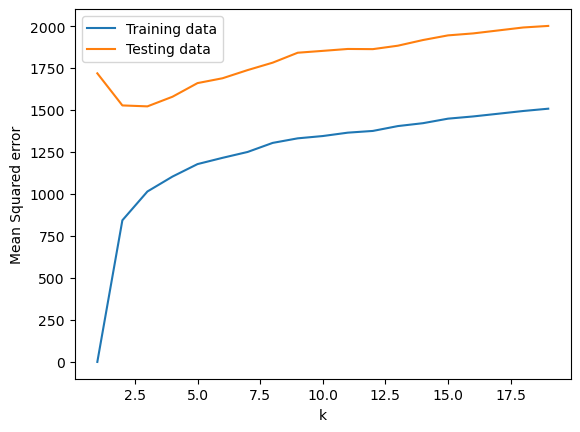

In [616]:
# Plot f1-scores for each k value
k_values = range(1,20)
plt.plot(k_values, rmse_train, label='Training data')
plt.plot(k_values, rmse_test, label='Testing data')
plt.xlabel('k')
plt.ylabel('Mean Squared error')
plt.legend()
plt.show()

In [643]:
knn = KNeighborsRegressor(n_neighbors=3).fit(train_X, train_Y)
knn_predicted_y_train= knn.predict(train_X)

In [644]:
regressionSummary(train_Y, knn_predicted_y_train)


Regression statistics

                      Mean Error (ME) : 4.2440
       Root Mean Squared Error (RMSE) : 1015.1985
            Mean Absolute Error (MAE) : 720.3206
          Mean Percentage Error (MPE) : -1.0345
Mean Absolute Percentage Error (MAPE) : 7.2205


In [645]:
knn_predicted_y_test= knn.predict(test_X)
regressionSummary(test_Y,knn_predicted_y_test)


Regression statistics

                      Mean Error (ME) : 124.0117
       Root Mean Squared Error (RMSE) : 1522.1421
            Mean Absolute Error (MAE) : 1057.3013
          Mean Percentage Error (MPE) : -0.2931
Mean Absolute Percentage Error (MAPE) : 9.7075


In [585]:
# decision tree model
dtx = predictors
dty = response
trainx, testx, trainy, testy = train_test_split (dtx, dty, test_size = 0.3, random_state = 432)

In [665]:
DT = DecisionTreeRegressor(max_depth= 8).fit(trainx, trainy)
predicted_y_training_dt = DT.predict(trainx)
regressionSummary(trainy,predicted_y_training_dt)



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 786.8161
            Mean Absolute Error (MAE) : 575.9293
          Mean Percentage Error (MPE) : -0.6752
Mean Absolute Percentage Error (MAPE) : 6.0004


In [666]:
predicted_y_test_dt = DT.predict(testx)
regressionSummary(testy,predicted_y_test_dt)


Regression statistics

                      Mean Error (ME) : -169.9321
       Root Mean Squared Error (RMSE) : 1234.6259
            Mean Absolute Error (MAE) : 951.0863
          Mean Percentage Error (MPE) : -2.6948
Mean Absolute Percentage Error (MAPE) : 9.6469


In [588]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators = 8)
rf.fit(trainx, trainy)
predict_Y_train = rf.predict(trainx)
regressionSummary(trainy, predict_Y_train)


Regression statistics

                      Mean Error (ME) : 22.1203
       Root Mean Squared Error (RMSE) : 530.4263
            Mean Absolute Error (MAE) : 364.9230
          Mean Percentage Error (MPE) : -0.1818
Mean Absolute Percentage Error (MAPE) : 3.5930


In [589]:
predict_Y_test = rf.predict(testx)
regressionSummary(testy, predict_Y_test)


Regression statistics

                      Mean Error (ME) : -173.4979
       Root Mean Squared Error (RMSE) : 1178.2040
            Mean Absolute Error (MAE) : 901.9346
          Mean Percentage Error (MPE) : -2.7954
Mean Absolute Percentage Error (MAPE) : 9.1520


In [638]:
RMSE_train = []
RMSE_test = []
for i in range(1,21):
    rf = RandomForestRegressor(n_estimators = i)
    rf.fit(trainx, trainy)
    predict_Y_train = rf.predict(trainx)
    rmse = np.sqrt(mean_squared_error(trainy, predict_Y_train))
    print ('Value = ',i)
    print('train stats')
    print(regressionSummary(trainy, predict_Y_train))
    print('test stats')
    predict_Y_test = rf.predict(testx)
    regressionSummary(testy, predict_Y_test)
    print('\n')
    rmse2 = np.sqrt(mean_squared_error(testy, predict_Y_test))
    RMSE_train.append(rmse)
    RMSE_test.append(rmse2)

Value =  1
train stats

Regression statistics

                      Mean Error (ME) : 58.1815
       Root Mean Squared Error (RMSE) : 916.5430
            Mean Absolute Error (MAE) : 431.2802
          Mean Percentage Error (MPE) : 0.1195
Mean Absolute Percentage Error (MAPE) : 4.2219
None
test stats

Regression statistics

                      Mean Error (ME) : -98.2136
       Root Mean Squared Error (RMSE) : 1503.2821
            Mean Absolute Error (MAE) : 1137.6362
          Mean Percentage Error (MPE) : -2.1115
Mean Absolute Percentage Error (MAPE) : 11.5520


Value =  2
train stats

Regression statistics

                      Mean Error (ME) : 1.0383
       Root Mean Squared Error (RMSE) : 786.6804
            Mean Absolute Error (MAE) : 430.9506
          Mean Percentage Error (MPE) : -0.4273
Mean Absolute Percentage Error (MAPE) : 4.2892
None
test stats

Regression statistics

                      Mean Error (ME) : -167.6725
       Root Mean Squared Error (RMSE) : 1340.7165

Value =  18
train stats

Regression statistics

                      Mean Error (ME) : 4.1473
       Root Mean Squared Error (RMSE) : 482.3725
            Mean Absolute Error (MAE) : 340.3595
          Mean Percentage Error (MPE) : -0.4405
Mean Absolute Percentage Error (MAPE) : 3.4038
None
test stats

Regression statistics

                      Mean Error (ME) : -174.1274
       Root Mean Squared Error (RMSE) : 1144.3229
            Mean Absolute Error (MAE) : 890.9568
          Mean Percentage Error (MPE) : -2.7814
Mean Absolute Percentage Error (MAPE) : 9.0438


Value =  19
train stats

Regression statistics

                      Mean Error (ME) : 4.6961
       Root Mean Squared Error (RMSE) : 473.3636
            Mean Absolute Error (MAE) : 339.6326
          Mean Percentage Error (MPE) : -0.3430
Mean Absolute Percentage Error (MAPE) : 3.3787
None
test stats

Regression statistics

                      Mean Error (ME) : -167.4396
       Root Mean Squared Error (RMSE) : 1153.136

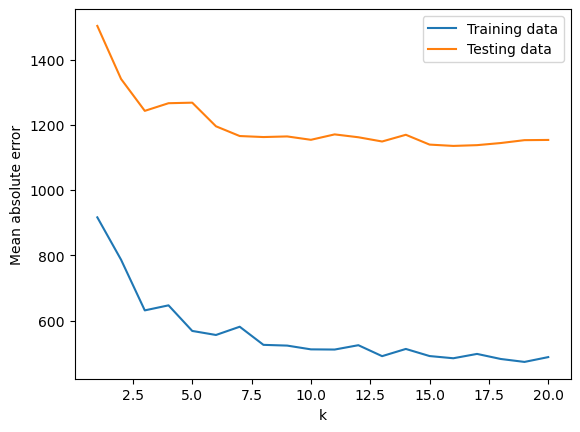

In [639]:
# Plot f1-scores for each k value
n_values = range(1,21)
plt.plot(n_values, RMSE_train, label='Training data')
plt.plot(n_values, RMSE_test, label='Testing data')
plt.xlabel('k')
plt.ylabel('Mean absolute error')
plt.legend()
plt.show()

In [696]:
# Random forest for optimal n estimators 
rf = RandomForestRegressor(n_estimators = 18, random_state = 47 )
rf.fit(trainx, trainy)
predict_Y_train = rf.predict(trainx)
regressionSummary(trainy, predict_Y_train)


Regression statistics

                      Mean Error (ME) : 11.6180
       Root Mean Squared Error (RMSE) : 467.8388
            Mean Absolute Error (MAE) : 335.4505
          Mean Percentage Error (MPE) : -0.3394
Mean Absolute Percentage Error (MAPE) : 3.3641


In [697]:
predict_Y_test = rf.predict(testx)
regressionSummary(testy, predict_Y_test)


Regression statistics

                      Mean Error (ME) : -167.9635
       Root Mean Squared Error (RMSE) : 1133.9835
            Mean Absolute Error (MAE) : 878.6539
          Mean Percentage Error (MPE) : -2.6272
Mean Absolute Percentage Error (MAPE) : 8.8985
